# Final Project

In [258]:
library('tidyverse')
library('forcats')

In [273]:
goals = read.csv("season_goals.csv") 
# I uploaded the csv to github with my final project if you need to download it

In [274]:
goals |> head()

,rank,position,hand,player,years,total_goals,status,yr_start,season,age,⋯,goals,assists,points,plus_minus,penalty_min,goals_even,goals_power_play,goals_short_handed,goals_game_winner,headshot
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,C,Left,Wayne Gretzky,1979-99,894,Retired,1979,1978-79,18,⋯,46,64,110,20,19,NA,NA,NA,NA,https://d9kjk42l7bfqz.cloudfront.net/req/201912031/images/headshots/gretzwa01.jpg
2,1,C,Left,Wayne Gretzky,1979-99,894,Retired,1979,1978-79,18,⋯,3,3,6,-3,0,3,0,0,NA,https://d9kjk42l7bfqz.cloudfront.net/req/201912031/images/headshots/gretzwa01.jpg
3,1,C,Left,Wayne Gretzky,1979-99,894,Retired,1979,1978-79,18,⋯,43,61,104,23,19,34,9,0,NA,https://d9kjk42l7bfqz.cloudfront.net/req/201912031/images/headshots/gretzwa01.jpg
4,1,C,Left,Wayne Gretzky,1979-99,894,Retired,1979,1979-80,19,⋯,51,86,137,14,21,37,13,1,6,https://d9kjk42l7bfqz.cloudfront.net/req/201912031/images/headshots/gretzwa01.jpg
5,1,C,Left,Wayne Gretzky,1979-99,894,Retired,1979,1980-81,20,⋯,55,109,164,41,28,36,15,4,3,https://d9kjk42l7bfqz.cloudfront.net/req/201912031/images/headshots/gretzwa01.jpg
6,1,C,Left,Wayne Gretzky,1979-99,894,Retired,1979,1981-82,21,⋯,92,120,212,80,26,68,18,6,12,https://d9kjk42l7bfqz.cloudfront.net/req/201912031/images/headshots/gretzwa01.jpg


In [275]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 6) 

goals2= goals |>
  group_by(player) |>
  summarize(
    position = first(position),
    goals= sum(goals),
    max_goals = max(total_goals)
  ) |>
  slice_max(order_by = max_goals, n = 20) |>
    mutate(player= fct_inorder(player)  |> fct_rev())

   

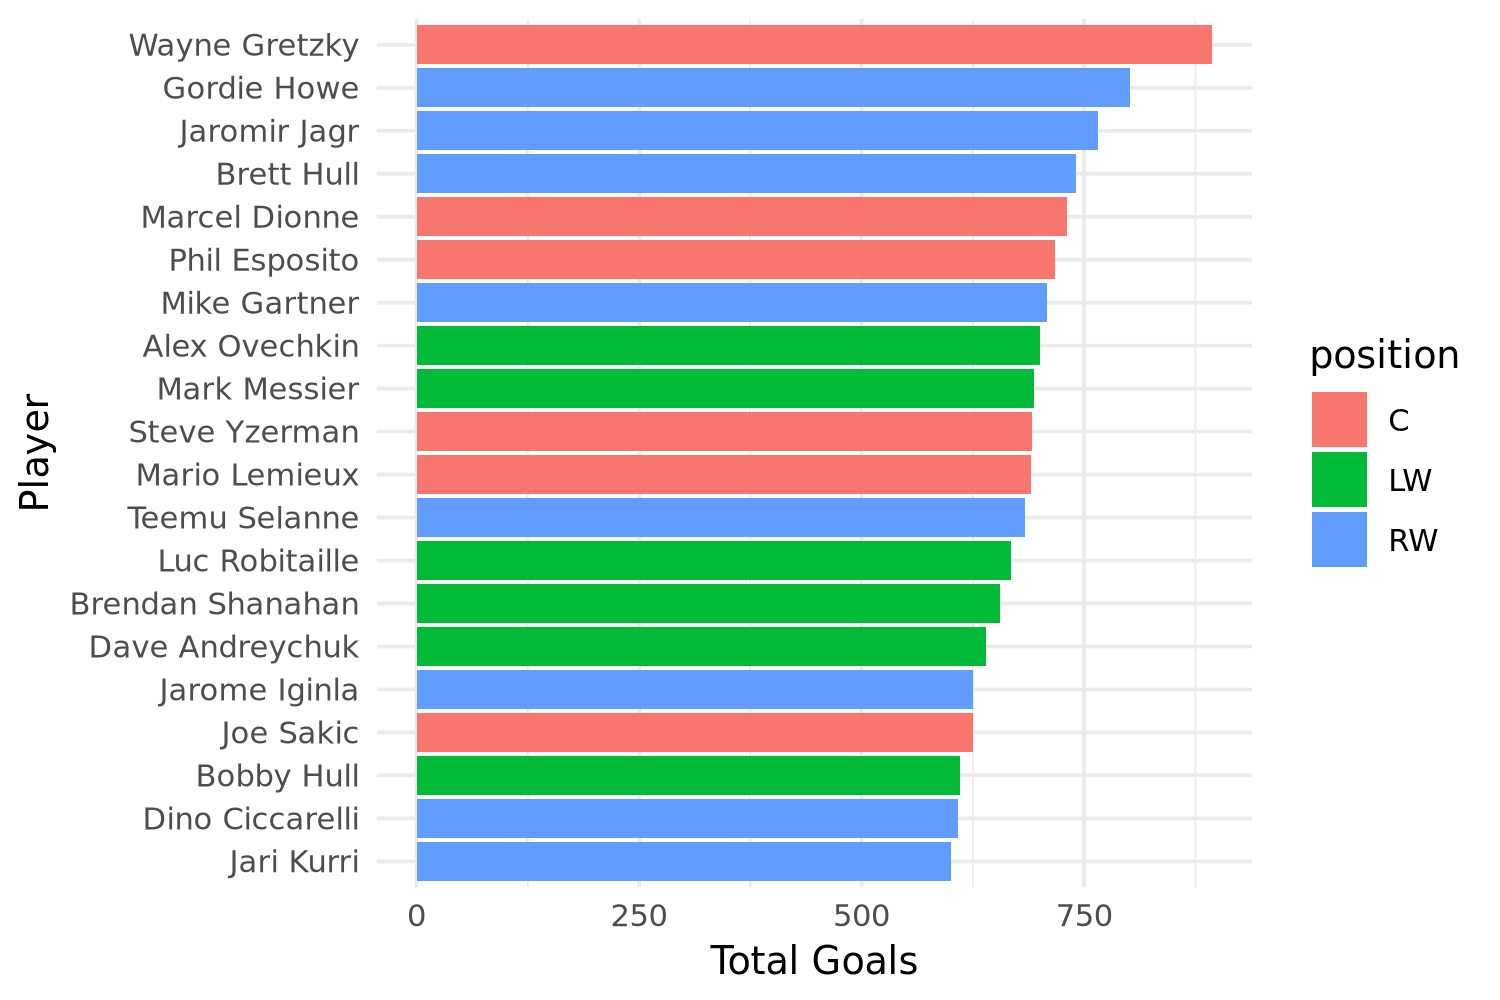

In [276]:
 ggplot(goals2,aes(x=max_goals, y=player, fill=position)) + geom_col() +
    labs(x="Total Goals", y="Player") + theme_minimal() + scale_color_brewer(palette= "Set2")

The bar chart above is showing the total number of goals scored by the top 20 goals scorers in the National Hockey League (NHL).  The dataset I used NHL player data during each season the player was in the NHL.  The data already came with a total goals column meaning I did not have to calculate it myself.  However, I needed to determine the top 20 total goals from the players in the dataset. I used the slice_max function to show the top 20 total goals and then I used the forcats package and function to display the players with the highest number of goals from highest to smallest on the barchart.  I used the fct_inorder function to order the players and the fct_rev function to switch the order to the greatest number of goals was on the top.  I also colored the bars by the position each person played and selected this grouping within the geom_col() function and made the fill= position.  I then changed the theme and the colors of the bar chart to make it more visually appealing and fixed the labels to make more sense.


Warning message in plot_theme(plot):
“The `axis.tick.x` theme element is not defined in the element hierarchy.”


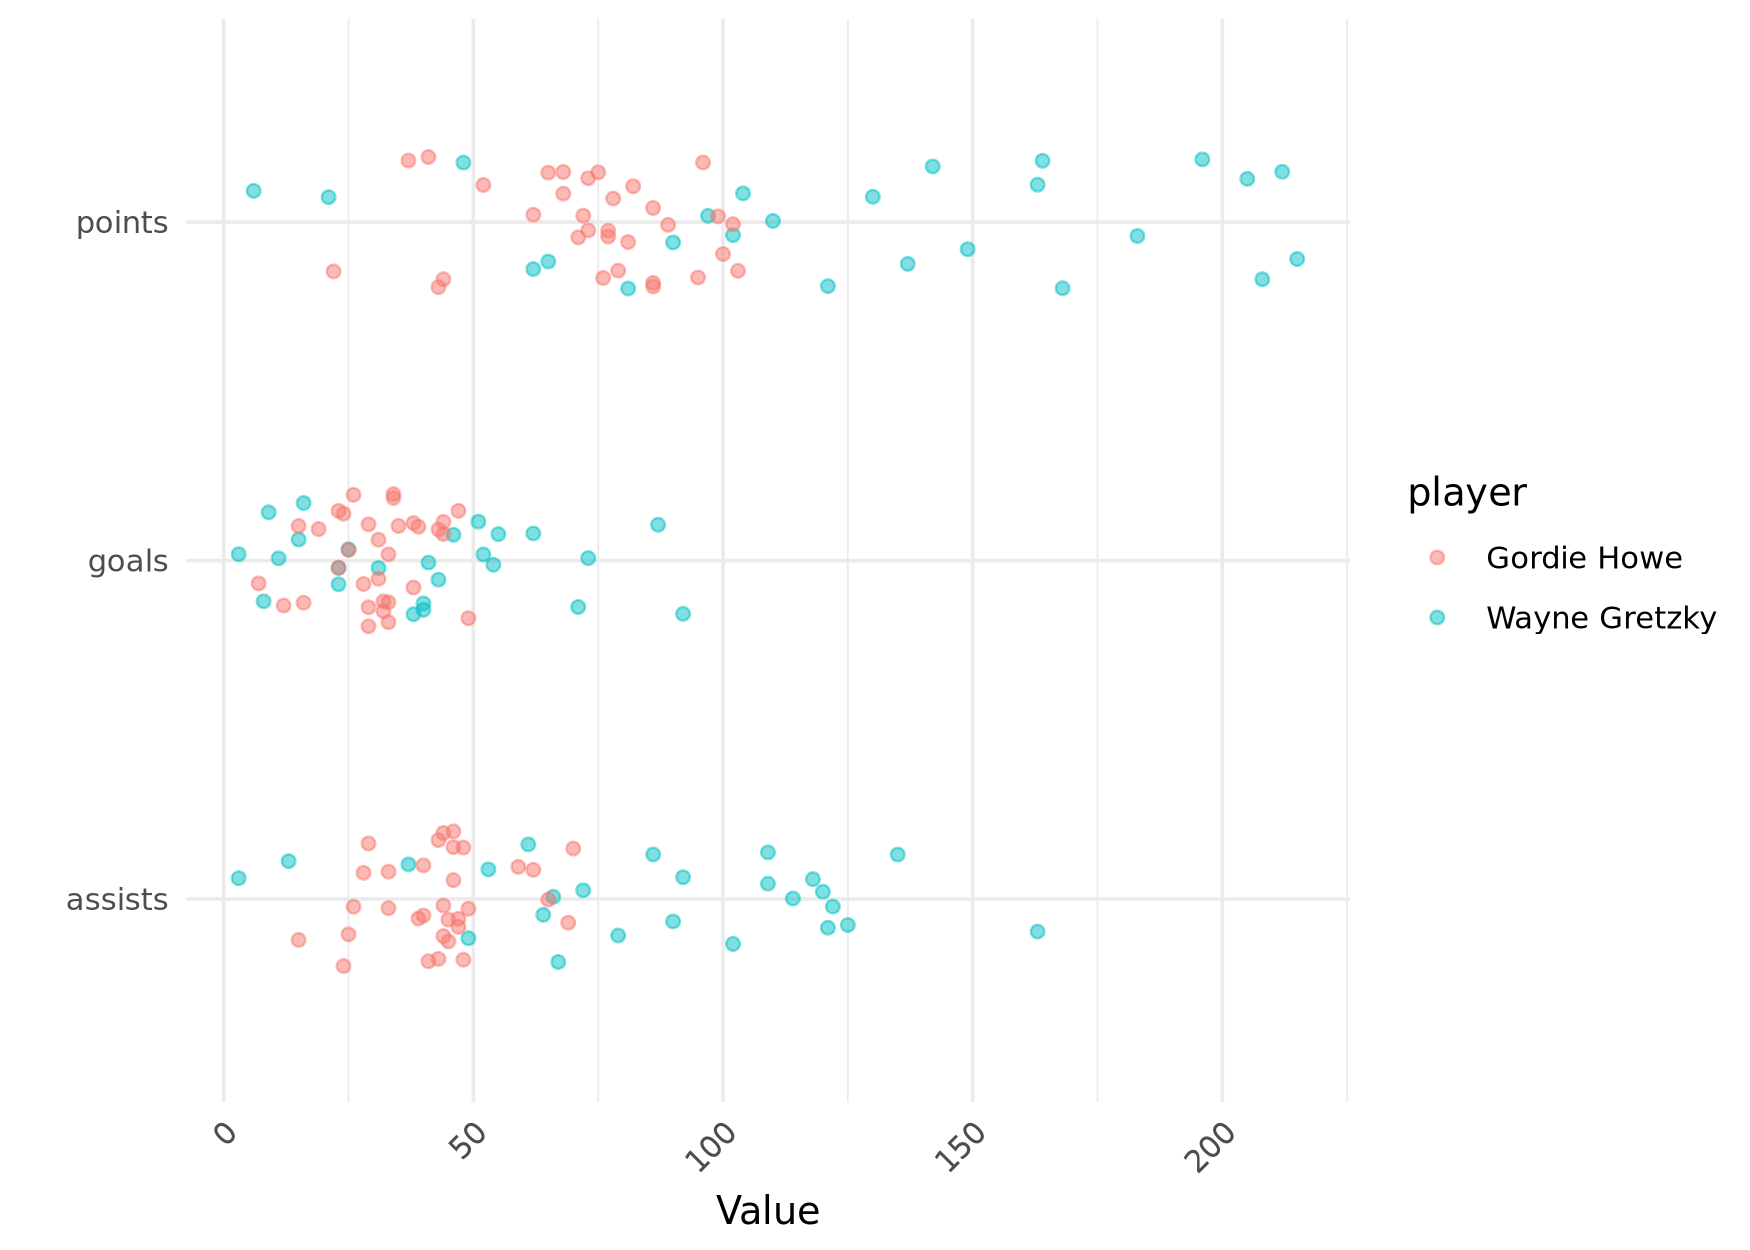

In [277]:
options(repr.plot.res = 250, repr.plot.height = 5
        , repr.plot.width = 7)

goals |> 
 filter(player %in% c("Wayne Gretzky", "Gordie Howe")) |>
    pivot_longer(cols = c(goals, assists, points)) |> 

    group_by(name) |>

    ggplot(aes(x=value, y=name, color=player)) + 
    geom_point(alpha = 0.5, na.rm = T, position = position_jitter(width = 0, height = 0.2)) +
    labs(x="Value", y= " ") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),axis.tick.x=element_text(angle=45))


The scatterplot made above shows the distribution of points, goals and assists of two NHL players.  The three y-values (points, assists and goals) were individual variables in the dataset and I needed to use pivot functions to create on variable (name) that had each variable and another variable (value) that listed the number from the variable for each player.   The different points within the three y values represent one NHL season and the distribution shows the variability in goals, points and assists each player had during their NHL career.  The colors represent one player.  I also used position jitter for the points to make the graph easier to visualize and see all the points. 


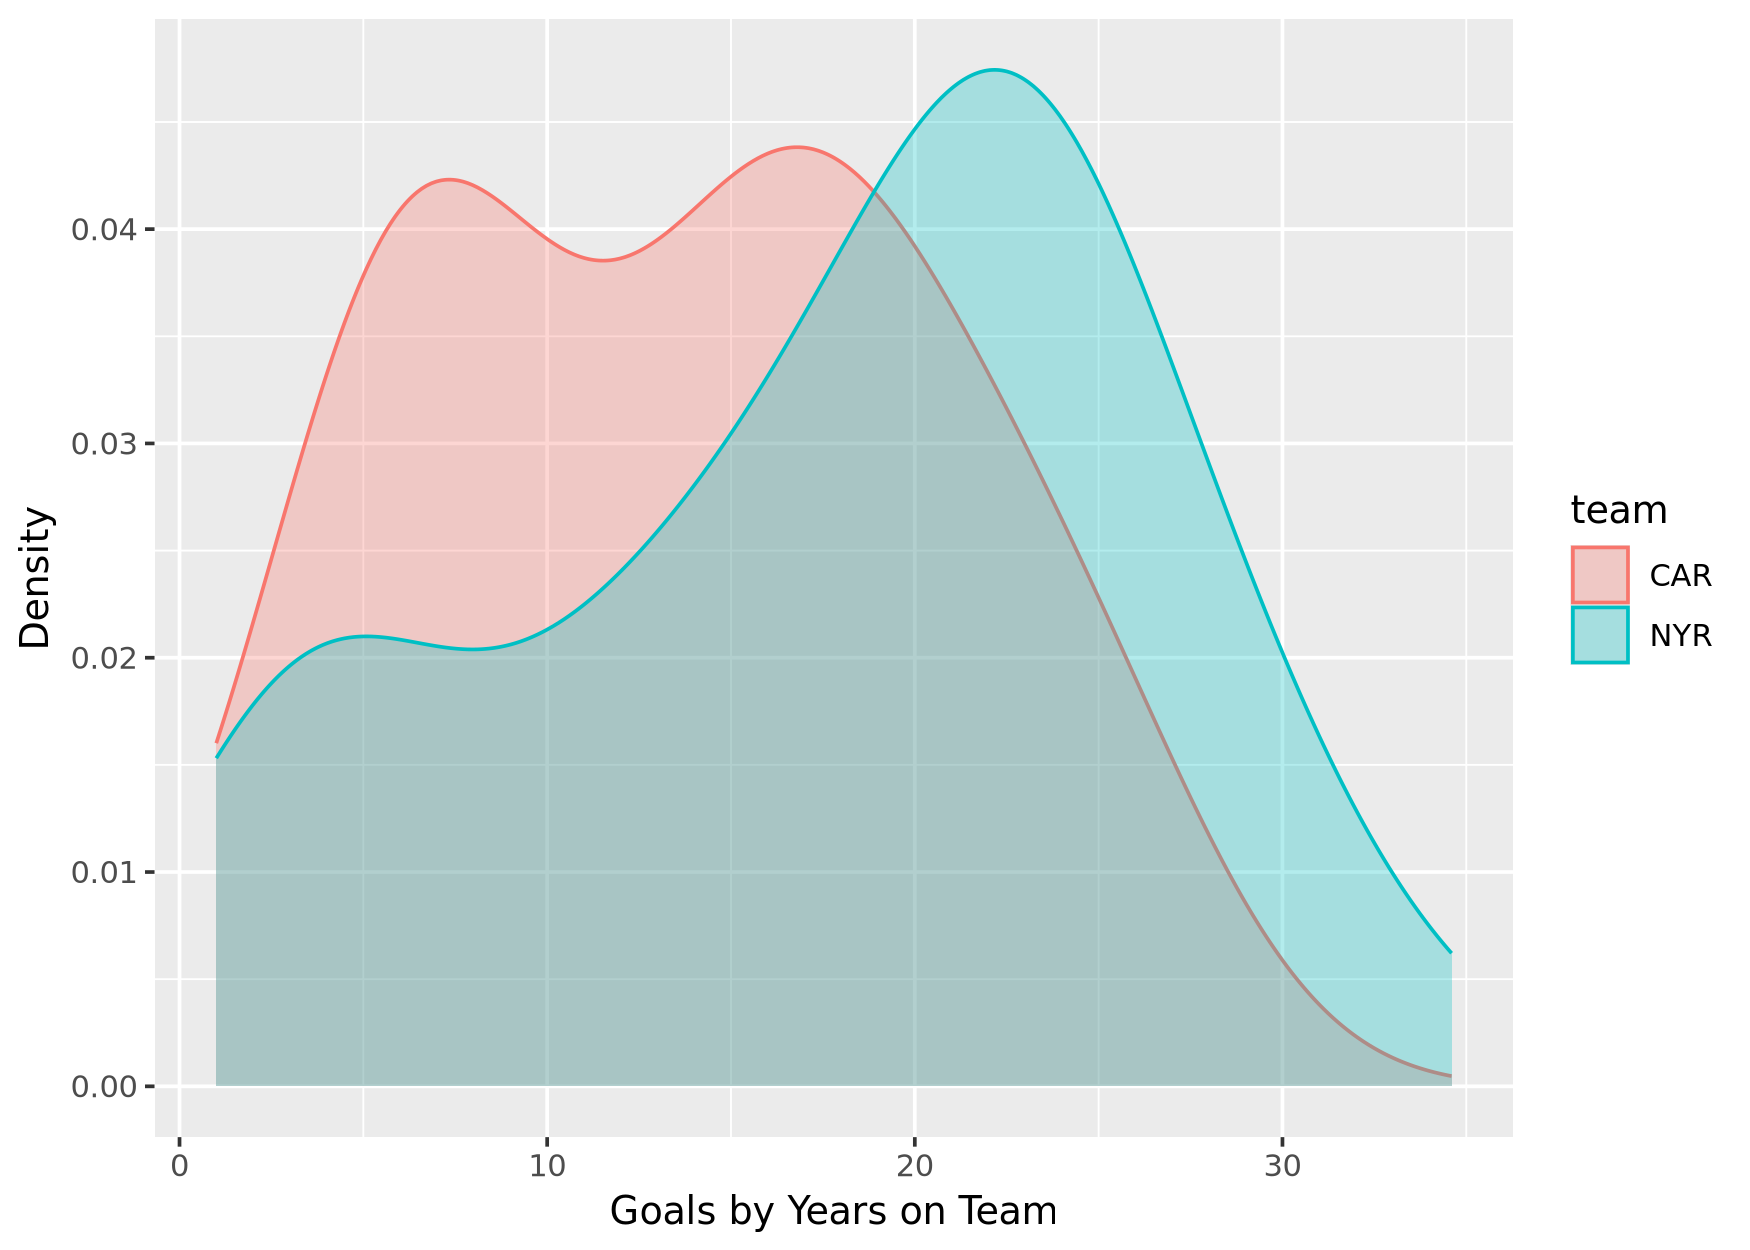

In [278]:
goals |>
    group_by(player) |>
    filter(team %in% c("NYR", "CAR")) |>
    summarize(goals= sum(goals), years= n(), team=first(team))  |>
    mutate(standardized_goals= goals/years) |>
    ggplot(aes(x=standardized_goals, fill=team, color=team
              )) + geom_density(alpha=0.3) + labs(x= "Goals by Years on Team", y="Density")
    

The graph above is a density plot showing the distribution of standardized goals by two NHL teams.  I first looked at number of goals by each player that was on the NYR or CAR, but realized these values do not mean much because players are on each team for different lengths of time meaning more years on the team, more goals.  I created a standardized goals variable which was total goals on team divided by years on team.  I then created two density plots for the NYR and CAR to show the distribution of Goals Standardized by each player that was ever on the team.  It shows that the New York Rangers have a higher distribution of standardized goals than the Carolina Hurricanes who also have a bimodal distribution. It shows that players on the NYR score a higher amount of goals than players on the density no matter how long they were on the team.


**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 